In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Load MAGIC Gamma Telescope dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(url, names=columns)
df


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [11]:

df['class'] = (df['class'] == 'g').astype(int)  # Convert g to 1, h to 0

# Split data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.74      1344
           1       0.83      0.93      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.84      0.79      0.81      3804
weighted avg       0.84      0.83      0.83      3804



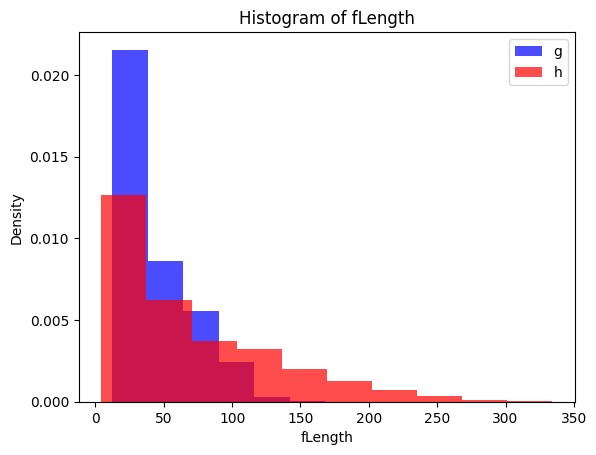

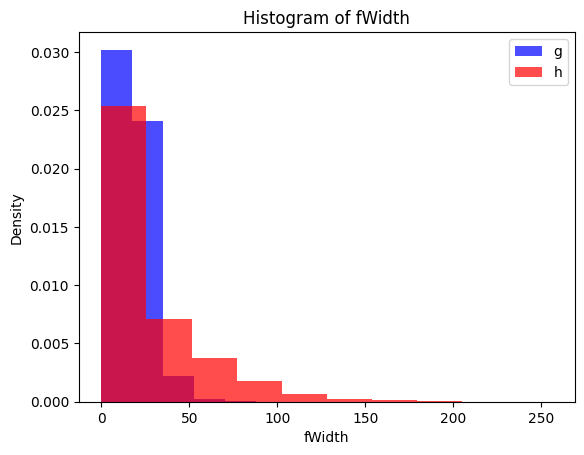

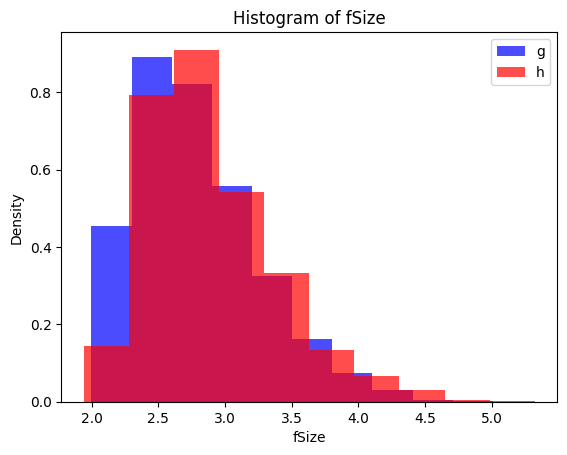

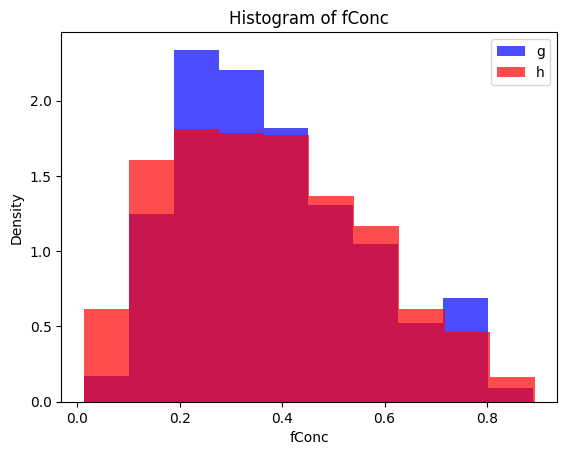

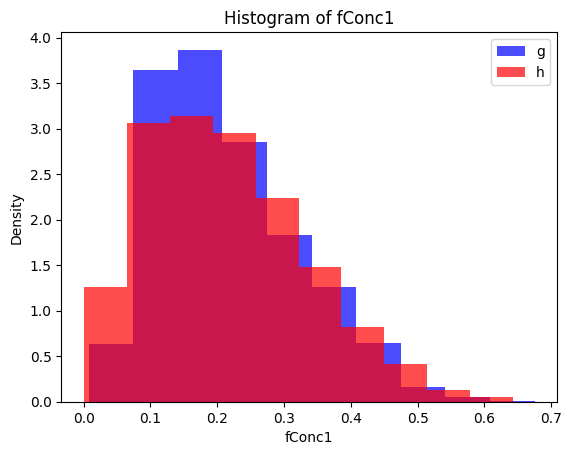

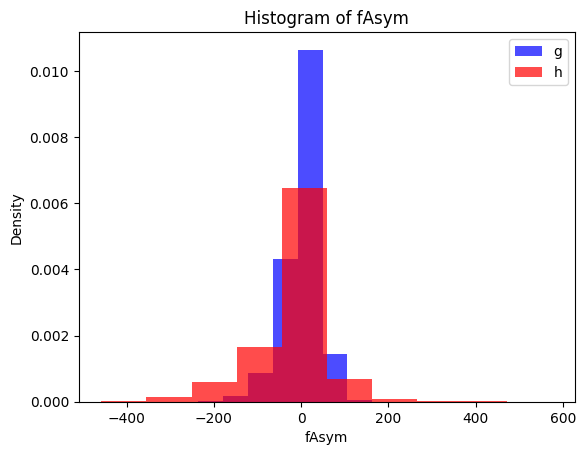

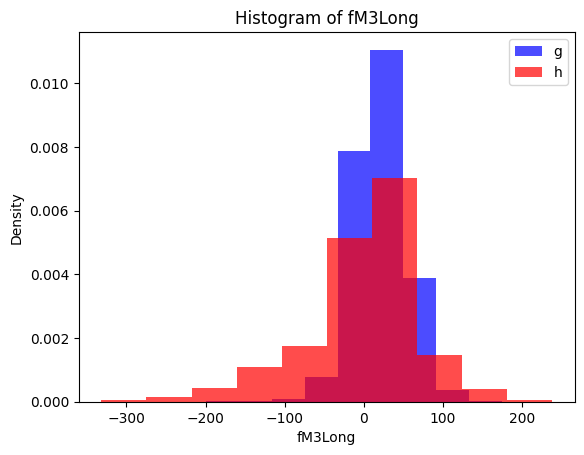

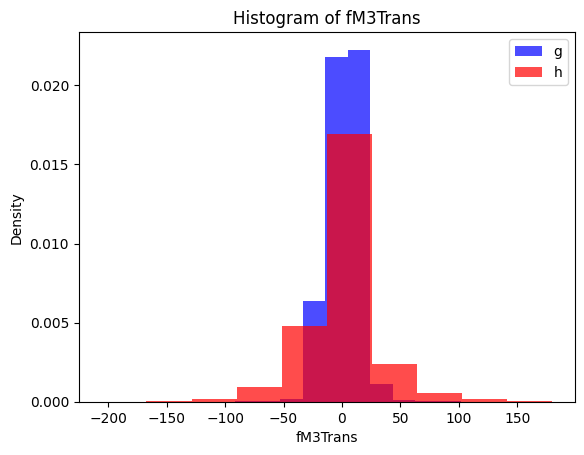

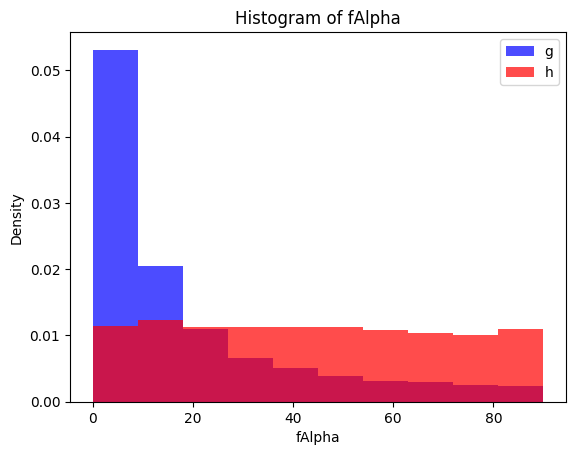

In [12]:
# plot the two classes g and h
import matplotlib.pyplot as plt
cols = X.columns
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', alpha=0.7, label='g', density=True)
    plt.hist(df[df["class"] == 0][label], color='red', alpha=0.7, label='h', density=True)
    plt.title(f'Histogram of {label}')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))] )

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    
    if oversample:
        ros = RandomOverSampler(random_state=42)
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

train, X_train, y_train = scale_dataset(train, oversample=True)
print("Train set shape:", train.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Train set shape: (14818, 11)
X_train shape: (14818, 10)
y_train shape: (14818,)


C:\Users\khaai\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
raise Exception("Stop") 

Exception: Stop

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset (same as above)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(url, names=columns)
df['class'] = (df['class'] == 'g').astype(int)

# Split and scale data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load Bike Sharing dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(url, encoding='latin1')
df = df[df['Hour'] == 12].drop(['Date', 'Hour', 'Holiday', 'Seasons', 'Wind speed (m/s)', 'Visibility (10m)', 'Functioning Day'], axis=1)

# Split data
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R-squared: {model.score(X_test, y_test):.2f}")

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load Seeds dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
df = pd.read_csv(url, sep='\s+', names=columns)

# Prepare data
X = df.drop('class', axis=1)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'cluster': kmeans.labels_})

# Plot
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca)
plt.title('K-Means Clustering with PCA')
plt.show()